<a href="https://colab.research.google.com/github/decile-team/submodlib/blob/master/tutorials/Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
!pip uninstall scikit-learn -y

Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 131kB/s 


In [ ]:
import sklearn
sklearn.__version__

'0.24.2'

In [ ]:
!pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ submodlib

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/
     |████████████████████████████████| 81kB 4.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for submodlib: filename=submodlib-1.1.1-cp37-cp37m-linux_x86_64.whl size=491341 sha256=11da48e9734c001c1b353f5f118899178669c852af537c54d658df3887713fd3
  Stored in directory: /root/.cache/pip/wheels/b2/07/ad/7fa8ce6d1fb8bc1151f12e71d93890202d77825591285200a5
Successfully built submodlib


# Prepare Data

The first step in using submodlib is obviously to have some data at hand. Below we create a synthetic dataset of 500 points distributed across 10 clusters with a standard deviation of 4. In practice, each data point could correspond to images or video frames or any other dataset where subset selection is desired.

In [ ]:
from sklearn.datasets import make_blobs
num_clusters = 100
cluster_std_dev = 4
points, cluster_ids, centers = make_blobs(n_samples=5000, centers=num_clusters, n_features=2, cluster_std=cluster_std_dev, center_box=(0,100), return_centers=True, random_state=4)
data = list(map(tuple, points))
xs = [x[0] for x in data]
ys = [x[1] for x in data]
import numpy as np
dataArray = np.array(data)

# Visualize Data

The visualization of the generated sample data shows the data points and the clusters.

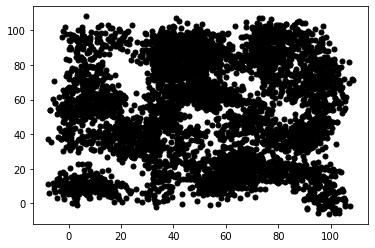

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(xs, ys, s=25, color='black', label="Images")

# Preparing FacilityLocation Object

In [ ]:
from submodlib.functions.facilityLocation import FacilityLocationFunction
obj = FacilityLocationFunction(n=5000, mode="dense", data=dataArray, metric="euclidean")

# NaiveGreedy Maximization

This uses [NaiveGreedyOptimizer](https://submodlib.readthedocs.io/en/latest/optimizers/naiveGreedy.html) and is the slowest.

1 loop, best of 5: 3.93 s per loop
Greedy vector: [(2558, 36.06966622730011), (3314, 33.98689480714393), (3749, 32.737086856520826), (4061, 29.409781042390414), (207, 27.854928990469215), (2794, 27.640988610994782), (4898, 27.41333964186927), (2509, 26.272228846331917), (273, 25.878615786745883), (2031, 25.520876761943555)]


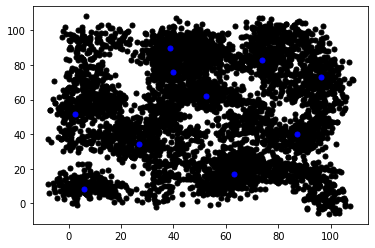

In [ ]:
%timeit greedyList = obj.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyList = obj.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

# StochasticGreedy Maximization

This uses [Stochastic or Random GreedyOptimizer](https://submodlib.readthedocs.io/en/latest/optimizers/stochasticGreedy.html) and is faster than naive greedy.

1 loop, best of 5: 1.17 s per loop
Greedy vector: [(2030, 35.5087100609746), (4501, 33.80147709938339), (2950, 32.26696280452056), (382, 29.173339993311842), (1773, 27.76892466227359), (3918, 27.57419550545174), (1489, 26.98147519257134), (1863, 26.07232263653854), (273, 25.878641508695434), (4498, 25.464491605109288)]


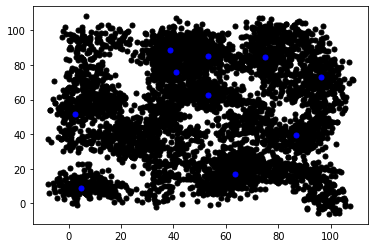

In [ ]:
%timeit greedyList = obj.maximize(budget=10, optimizer='StochasticGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyList = obj.maximize(budget=10, optimizer='StochasticGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

# LazyGreedy Maximization

This uses [LazyGreedyOptimizer](https://submodlib.readthedocs.io/en/latest/optimizers/lazyGreedy.html) and is faster then naive greddy or random greedy. This optimizer requires the function to be submodular.

1 loop, best of 5: 417 ms per loop
Greedy vector: [(2558, 36.06966622730011), (3314, 33.98689480714393), (3749, 32.737086856520826), (4061, 29.409781042390414), (207, 27.854928990469215), (2794, 27.640988610994782), (4898, 27.41333964186927), (2509, 26.272228846331917), (273, 25.878615786745883), (2031, 25.520876761943555)]


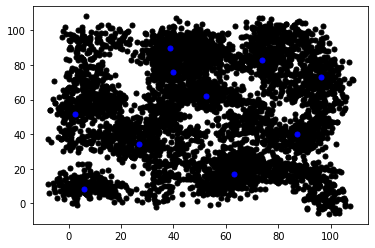

In [ ]:
%timeit greedyList = obj.maximize(budget=10, optimizer='LazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyList = obj.maximize(budget=10, optimizer='LazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

# LazierThanLazyGreedy Maximization

This uses [LazierThanLazyGreedyOptimizer](https://submodlib.readthedocs.io/en/latest/optimizers/lazierThanLazyGreedy.html). For submodular functions, this is the fastest optimizer.

1 loop, best of 5: 405 ms per loop
Greedy vector: [(2030, 35.5087100609746), (4501, 33.80147709938339), (2950, 32.26696280452056), (382, 29.173339993311842), (1773, 27.76892466227359), (3918, 27.57419550545174), (1489, 26.98147519257134), (1863, 26.07232263653854), (273, 25.878641508695434), (4498, 25.464491605109288)]


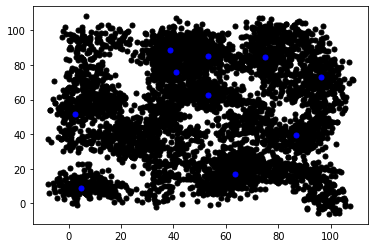

In [ ]:
%timeit greedyList = obj.maximize(budget=10, optimizer='LazierThanLazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyList = obj.maximize(budget=10, optimizer='LazierThanLazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")